In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import msprime
import tsinfer
from scipy import stats
from IPython.display import SVG, display
import itertools
import sys
sys.path.insert(0, "/home/wilderwohns/relative_allele_age/relative_age")
import simulations
import compare
import ordering
from collections import defaultdict

/home/wilderwohns/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load Files

In [2]:
sample_1000_length_1e5_rec_2e8=pd.read_csv("../data/sample_1000_length_1e5_rec_2e-8",header=None)
sample_500_length_1e5_rec_2e8=pd.read_csv("../data/sample_500_length_1e5_rec_2e-8",header=None)
sample_100_length_1e5_rec_2e8=pd.read_csv("../data/sample_100_length_1e5_rec_2e-8",header=None)

sample_1000_length_5e4_rec_2e8=pd.read_csv("../data/sample_1000_length_5e4_rec_2e-8",header=None)
sample_500_length_5e4_rec_2e8=pd.read_csv("../data/sample_500_length_5e4_rec_2e-8",header=None)
sample_100_length_5e4_rec_2e8=pd.read_csv("../data/sample_100_length_5e4_rec_2e-8",header=None)

sample_100_length_25e3_rec_2e8=pd.read_csv("../data/sample_100_length_25e3_rec_2e-8",header=None)

#variable mut rates
sample_1000_length_5e4_mut_2e7=pd.read_csv("../data/sample1000_length5e4_mutrate_2e7/summary_stats",header=None)
sample_1000_length_5e4_mut_2e8=pd.read_csv("../data/sample1000_length5e4_mutrate_2e8/summary_stats",header=None)
sample_1000_length_5e4_mut_2e9=pd.read_csv("../data/sample1000_length5e4_mutrate_2e9/summary_stats",header=None)

#variable mut rates with all distances between pairs
sample_1000_length_5e4_mut_2e7_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/summary_stats",header=None)
sample_1000_length_5e4_mut_25e8_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/summary_stats",header=None)
sample_1000_length_5e4_mut_2e8_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/summary_stats",header=None)
sample_1000_length_5e4_mut_25e9_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/summary_stats",header=None)
sample_1000_length_5e4_mut_2e9_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/summary_stats",header=None)

sample_1000_length_1e5_mut_2e7_incl_all_distances=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/summary_stats",header=None)
sample_1000_length_1e5_mut_25e8=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/summary_stats",header=None)
sample_1000_length_1e5_mut_2e8_incl_all_distances=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/summary_stats',header=None)
sample_1000_length_1e5_mut_25e9=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/summary_stats",header=None)
sample_1000_length_1e5_mut_2e9_incl_all_distances=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/summary_stats',header=None)

In [6]:
#Files with new distances

sample_1000_length_1e5_mut_2e7_new=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e7_new/summary_stats",header=None)
sample_1000_length_1e5_mut_632e8_new=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-8_new/summary_stats",header=None)
sample_1000_length_1e5_mut_2e8_new=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e8_new/summary_stats',header=None)
sample_1000_length_1e5_mut_632e9_new=pd.read_csv("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-9_new/summary_stats",header=None)
sample_1000_length_1e5_mut_2e9_new=pd.read_csv('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e9_new/summary_stats',header=None)

In [5]:
sample1000_5e4_mut_rates=[("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/summary_stats",2e-9),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/summary_stats",2e-8),
                          ('/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/summary_stats',2e-7)]

In [6]:
sample1000_1e5_mut_rates=[('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e9_new/summary_stats',2e-9),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-9_new/summary_stats",6.32e-9),
                          ('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e8_new/summary_stats',2e-8),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-8_new/summary_stats",6.32e-8),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e7_new/summary_stats",2e-7),]

In [7]:
sample1000_5e4_mut_rates_empirical=[('/home/wilderwohns/relative_allele_age/data/sample1000_5e4_mutrate_2e9_empirical/summary_stats',2e-9),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_632e9_empirical/summary_stats",6.32e-9),
                                    ('/home/wilderwohns/relative_allele_age/data/sample1000_5e4_mutrate_2e8_empirical/summary_stats',2e-8),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_632e8_empirical/summary_stats",6.32e-8),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_5e4_mutrate_2e7_empirical/summary_stats","2e-7")]

In [8]:
sample1000_1e5_mut_rates_empirical=[('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_2e9_empirical/summary_stats',2e-9),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_632e9_empirical/summary_stats",6.32e-9),
                                    ('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_2e8_empirical/summary_stats',2e-8),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_632e8_empirical/summary_stats",6.32e-8),
                                    ("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_2e7_empirical/summary_stats",2e-7)]

# violin plots

In [15]:
def violin_accuracy(file_list):
    dataframes=list()
    for file in file_list:
        dataframes.append(pd.read_csv(file[0]))
    for dataframe in dataframes:
        print(dataframe.shape)
    accuracy_metrics=list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        accuracy_metrics.append(pd.DataFrame({'Incorrectly Ordered': dataframe.iloc[:,4],'Mutation Rate':cur_mut_rate,'Method':'Frequency'}))
        accuracy_metrics.append(pd.DataFrame({'Incorrectly Ordered': dataframe.iloc[:,5],'Mutation Rate':cur_mut_rate,'Method':'GEVA'}))
#         print("Direct " + cur_mut_rate+" Frequency "+str(dataframe.iloc[:,4].mean()))
#         print("Direct " + cur_mut_rate+" Geva "+str(dataframe.iloc[:,5].mean()))  
    
    multiple_mut_rates=pd.concat(accuracy_metrics)
    
    all_sites_accuracy_metrics=list()
    for idx,dataframe in enumerate(dataframes):   
        cur_mut_rate=file_list[idx][1]
        all_freq_accuracy=dataframe.iloc[:,1]/(dataframe.iloc[:,0]+dataframe.iloc[:,1])
        all_geva_accuracy=dataframe.iloc[:,3]/(dataframe.iloc[:,2]+dataframe.iloc[:,3])
        all_sites_accuracy_metrics.append(pd.DataFrame({'Incorrectly Ordered': all_freq_accuracy,'Mutation Rate':file_list[idx][1],'Method':'Frequency'}))
        all_sites_accuracy_metrics.append(pd.DataFrame({'Incorrectly Ordered': all_geva_accuracy,'Mutation Rate':file_list[idx][1],'Method':'GEVA'}))
#         print("All " + cur_mut_rate+" Frequency "+str(all_freq_accuracy.mean()))
#         print("ALl " + cur_mut_rate+" Geva "+str(all_geva_accuracy.mean()))  
        
        
    all_multiple_mut_rates=pd.concat(all_sites_accuracy_metrics)

    mut_rates = [i[1] for i in file_list]
    pretty_mut_rates = [str(i[1]).split("e")[0]+"$e^{"+str(i[1]).split("e")[1] + "}$" for i in file_list]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey='row')
    sns.violinplot(x="Mutation Rate",y="Incorrectly Ordered",hue='Method',split="True",
                   inner="quart",order=mut_rates,
                   palette="Set2",cut=2,data=multiple_mut_rates,ax=axes[0])

    
    axes[0].set_xticklabels(pretty_mut_rates)
    plt.xlabel(u"Mutation rate per base per generation (\u03bc)")
    plt.ylabel("Proportion Incorrectly Ordered\n Mutation Pairs")
    #plt.legend(loc='upper left')
    axes[0].set_title("Rate of Incorrect Ordering: \nDirectly Comparable Mutation Pairs")
   
    
    sns.violinplot(x="Mutation Rate",y="Incorrectly Ordered",hue='Method',split="True",
               inner="quart",order=mut_rates,
               palette="Set2",cut=3,data=all_multiple_mut_rates, ax=axes[1])
    axes[1].set_xticklabels(pretty_mut_rates)
    axes[1].set_xlabel(u"Mutation rate per base per generation (\u03bc)")
    axes[1].set_ylabel("Proportion Incorrectly Ordered\n Mutation Pairs")
    #axes[1].legend(loc='upper left')
    axes[1].set_title("Rate of Incorrect Ordering: \nAll Mutation Pairs")
    plt.tight_layout()
    plt.savefig("Violin_Plot_Incorrect_Ordering_Empirical_error")        
    

(284, 12)
(287, 12)
(283, 12)
(280, 12)
(287, 12)


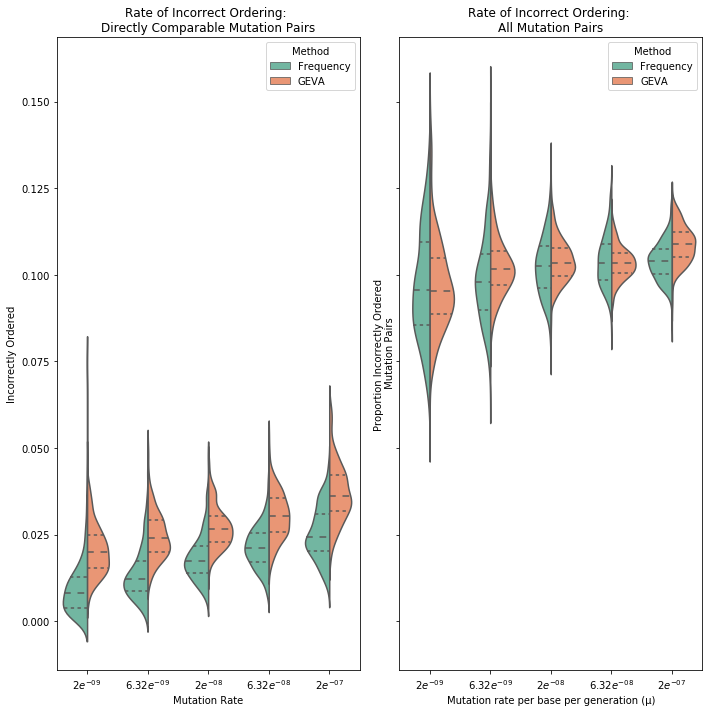

In [12]:
violin_accuracy(sample1000_1e5_mut_rates)

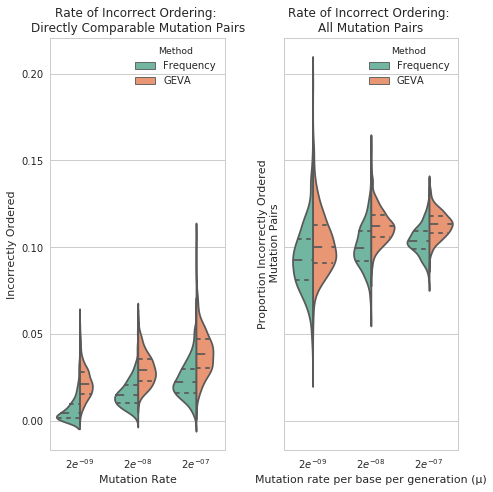

In [158]:
violin_accuracy(sample1000_5e4_mut_rates)

(213, 12)
(219, 12)
(224, 12)
(225, 12)
(220, 12)


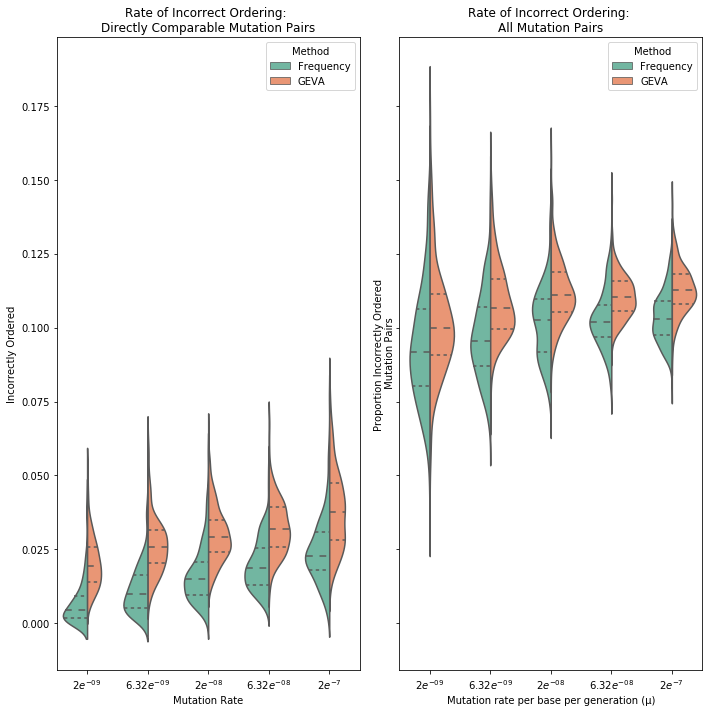

In [16]:
violin_accuracy(sample1000_5e4_mut_rates_empirical)

(63, 12)
(65, 12)
(64, 12)
(65, 12)
(64, 12)


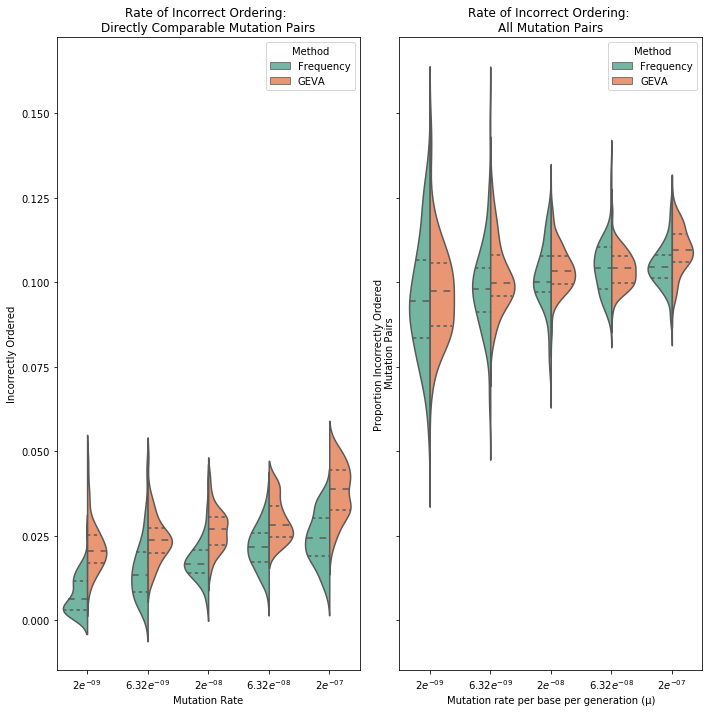

In [17]:
violin_accuracy(sample1000_1e5_mut_rates_empirical)

In [161]:
def significantly_different(summary_stats):
    summary_stats = pd.read_csv(summary_stats,header=None)
    
    
    
    all_freq_accuracy=summary_stats.iloc[:,1]/(summary_stats.iloc[:,0]+summary_stats.iloc[:,1])
    all_geva_accuracy=summary_stats.iloc[:,3]/(summary_stats.iloc[:,2]+summary_stats.iloc[:,3])
    
    print("For Direct Comparison Accuracy Freq vs. GEVA: ",stats.ttest_rel(summary_stats.iloc[:,4], summary_stats.iloc[:,5])[1])
    print("For All Sites Accuracy Freq vs. GEVA: ",stats.ttest_rel(all_freq_accuracy, all_geva_accuracy)[1])
    #print("For Distance Be Sites Accuracy Freq vs. GEVA: ",stats.ttest_rel(all_freq_accuracy, all_geva_accuracy)[1])
    
    
    

In [147]:
significantly_different('/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-8_new/summary_stats')

For Direct Comparison Accuracy Freq vs. GEVA:  9.175526517772805e-61
For All Sites Accuracy Freq vs. GEVA:  0.17479940097469085


# Distance plots

In [23]:
def distance_plots(file_list):
    dataframes=list()
    for file in file_list:
        dataframes.append(pd.read_csv(file[0]))
    
    directly_comparable_distance_metrics=list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,6],'Mutation Rate':cur_mut_rate,'Method':'Frequency'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,7],'Mutation Rate':cur_mut_rate,'Method':'GEVA'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,8],'Mutation Rate':cur_mut_rate,'Method':'All Pairs'}))
#         print("Direct " + cur_mut_rate+" Frequency "+str(dataframe.iloc[:,4].mean()))
#         print("Direct " + cur_mut_rate+" Geva "+str(dataframe.iloc[:,5].mean()))  
    
    
    multiple_mut_rates=pd.concat(directly_comparable_distance_metrics)
    
    #Now for all sites
    all_distance_metrics = list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,9],'Mutation Rate':cur_mut_rate,'Method':'Frequency'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,10],'Mutation Rate':cur_mut_rate,'Method':'GEVA'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,11],'Mutation Rate':cur_mut_rate,'Method':'All Pairs'}))

    all_multiple_mut_rates=pd.concat(all_distance_metrics)

    mut_rates = [i[1] for i in file_list]
    pretty_mut_rates = [str(i[1]).split("e")[0]+"$e^{"+str(i[1]).split("e")[1] + "}$" for i in file_list]
    
    #Averages
    direct_mean_by_rate = multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    direct_mean_by_rate.sort_index(level=0)
    
    all_mean_by_rate=all_multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    all_mean_by_rate.sort_index(level=0)
                 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 7), sharey='row')
    axes[0].plot(direct_mean_by_rate.xs("All Pairs"),'-o',label="All Pairs")
    axes[0].plot(direct_mean_by_rate.xs("GEVA"),'-o',label="GEVA")
    axes[0].plot(direct_mean_by_rate.xs("Frequency"),'-o',label="Frequency")
    axes[0].set_yscale('log')
    axes[0].set_xscale('log')
    #plt.xlim(1.5e-9,2.5e-7)
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[0].set_xlabel("Mutation Rate")
    axes[0].set_ylabel("Distance in bp")
    axes[0].legend()
    axes[0].set_title("Average Distance Separating Mutations")
 
    axes[1].plot(all_mean_by_rate.xs("All Pairs"),'-o',label="All Pairs")
    axes[1].plot(all_mean_by_rate.xs("GEVA"),'-o',label="GEVA")
    axes[1].plot(all_mean_by_rate.xs("Frequency"),'-o',label="Frequency")
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[1].set_xlabel("Mutation Rate")
    axes[1].set_ylabel("Distance in bp")
    axes[1].legend()
    axes[1].set_title("Average Distance Separating Mutations")
    
    #violin plot method
    #sns.violinplot(x="Mutation Rate", y="Distance", hue="Method", data=multiple_mut_rates)

    plt.tight_layout()
    

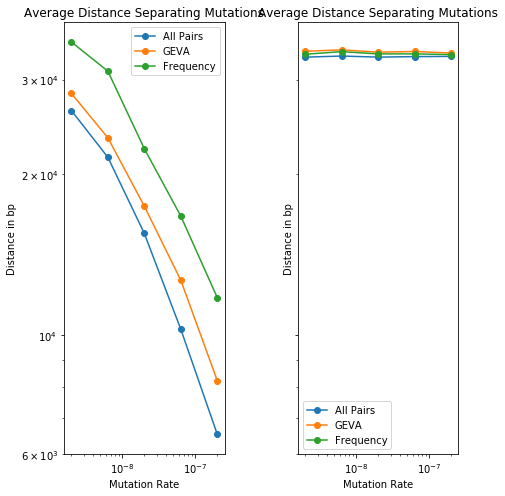

In [24]:
distance_plots(sample1000_1e5_mut_rates_empirical)

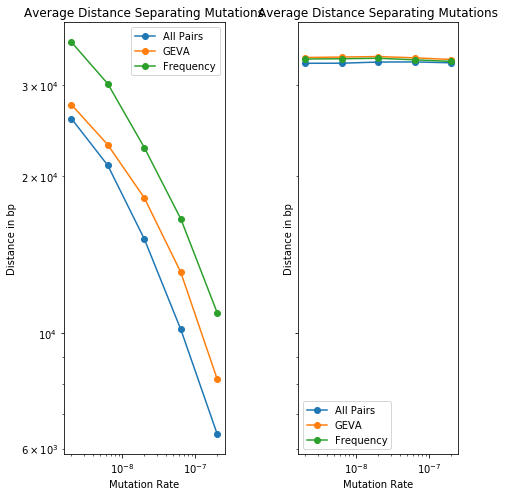

In [25]:
distance_plots(sample1000_1e5_mut_rates)

# Accuracy of Frequency vs. GEVA

In [26]:
length_1e5_rec_2e8=np.zeros((3,4))

#add the means
length_1e5_rec_2e8[0,0:2]=sample_100_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[1,0:2]=sample_500_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[2,0:2]=sample_1000_length_1e5_rec_2e8.mean(0)[0:2]

#add the standard deviations
length_1e5_rec_2e8[0,2:4]=sample_100_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[1,2:4]=sample_500_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[2,2:4]=sample_1000_length_1e5_rec_2e8.std(0)[0:2]

In [27]:
length_5e4_rec_2e8=np.zeros((3,2))
length_5e4_rec_2e8[0,0]=sample_100_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[0,1]=sample_100_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[1,0]=sample_500_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[1,1]=sample_500_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[2,0]=sample_1000_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[2,1]=sample_1000_length_5e4_rec_2e8.mean(0)[1]

In [28]:
length_25e3_rec_2e8=np.zeros((1,2))
length_25e3_rec_2e8[0,0]=sample_100_length_25e3_rec_2e8.mean(0)[0]
length_25e3_rec_2e8[0,1]=sample_100_length_25e3_rec_2e8.mean(0)[1]

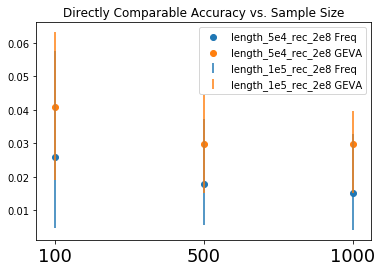

In [29]:
fig, ax = plt.subplots(1,1)
x=[0,1,2]

ax.errorbar(x, length_1e5_rec_2e8[:,0], yerr=2*length_1e5_rec_2e8[:,2], linestyle='',label='length_1e5_rec_2e8 Freq')
#ax.scatter(x,length_1e5_rec_2e8[:,0],label='length_1e5_rec_2e8 Freq')
ax.errorbar(x, length_1e5_rec_2e8[:,1], yerr=2*length_1e5_rec_2e8[:,3], linestyle='',label='length_1e5_rec_2e8 GEVA')
#ax.scatter(x,length_1e5_rec_2e8[:,1],label='length_1e5_rec_2e8 GEVA')

ax.scatter(x,length_5e4_rec_2e8[:,0],label='length_5e4_rec_2e8 Freq')
ax.scatter(x,length_5e4_rec_2e8[:,1],label='length_5e4_rec_2e8 GEVA')

#ax.scatter([0],length_25e3_rec_2e8[:,0],label='length_25e3_rec_2e8 Freq')
#ax.scatter([0],length_25e3_rec_2e8[:,1],label='length_25e3_rec_2e8 GEVA')

x_ticks_labels = ['100','500','1000']

# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=18)
ax.set_title("Directly Comparable Accuracy vs. Sample Size")
ax.legend()
plt.savefig("Directly Comparable Accuracy vs Sample Size")

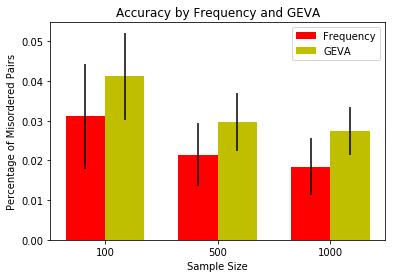

In [30]:
N = 3
freq_means = length_1e5_rec_2e8[:,0]
freq_std = length_1e5_rec_2e8[:,2]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, freq_means, width, color='r', yerr=freq_std)

geva_means = length_1e5_rec_2e8[:,1]
geva_std = length_1e5_rec_2e8[:,3]
rects2 = ax.bar(ind + width, geva_means, width, color='y', yerr=geva_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Misordered Pairs')
ax.set_title('Accuracy by Frequency and GEVA')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('100', '500', '1000'))
ax.set_xlabel("Sample Size")

ax.legend((rects1[0], rects2[0]), ('Frequency', 'GEVA'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
plt.savefig("Bar Plot Accuracy by Frequency and GEVA")
plt.show()


In [31]:
length_1e5_rec_2e8

array([[0.0311076 , 0.04115634, 0.01318467, 0.01100291],
       [0.02146227, 0.02976022, 0.0078419 , 0.00732775],
       [0.01844128, 0.02738279, 0.00712563, 0.00614444]])

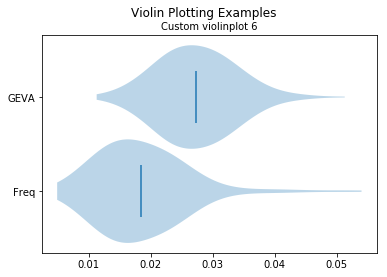

In [32]:
fig, ax = plt.subplots()

ax.violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=False, showmedians=False,
                      bw_method=0.5)
# ax.violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
# ax.violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
ax.set_title('Custom violinplot 6', fontsize=10)
ax.set_yticks([0,1])
ax.set_yticklabels(('Freq', 'GEVA'))


fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

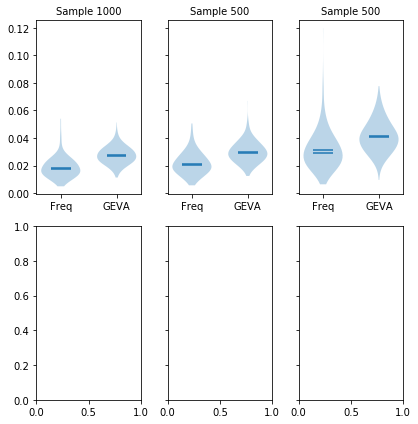

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey='row')

axes[0,0].violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,0].set_title('Sample 1000', fontsize=10)
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(('Freq', 'GEVA'))

axes[0,1].violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,1].set_title('Sample 500', fontsize=10)
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(('Freq', 'GEVA'))

axes[0,2].violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,2].set_title('Sample 500', fontsize=10)
axes[0,2].set_xticks([0,1])
axes[0,2].set_xticklabels(('Freq', 'GEVA'))




fig.subplots_adjust(hspace=0.4)
fig.tight_layout()
plt.show()



## Showing difference in mutation rates

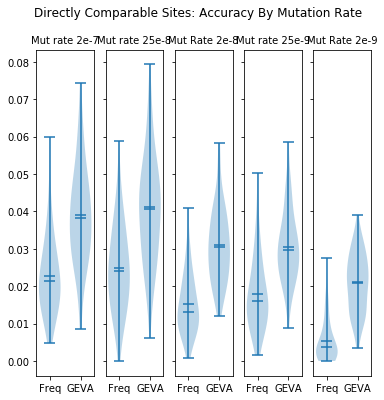

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 6), sharey='row')

axes[0].violinplot(sample_1000_length_5e4_mut_2e7.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0].set_title('Mut rate 2e-7', fontsize=10)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(('Freq', 'GEVA'))

axes[1].violinplot(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[1].set_title('Mut rate 25e-8', fontsize=10)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(('Freq', 'GEVA'))

axes[2].violinplot(sample_1000_length_5e4_mut_2e8.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[2].set_title('Mut Rate 2e-8', fontsize=10)
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(('Freq', 'GEVA'))

axes[3].violinplot(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[3].set_title('Mut rate 25e-9', fontsize=10)
axes[3].set_xticks([0,1])
axes[3].set_xticklabels(('Freq', 'GEVA'))

axes[4].violinplot(sample_1000_length_5e4_mut_2e9.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[4].set_title('Mut Rate 2e-9', fontsize=10)
axes[4].set_xticks([0,1])
axes[4].set_xticklabels(('Freq', 'GEVA'))

fig.subplots_adjust(hspace=0.4)

fig.suptitle("Directly Comparable Sites: Accuracy By Mutation Rate")
#fig.tight_layout()
plt.show()

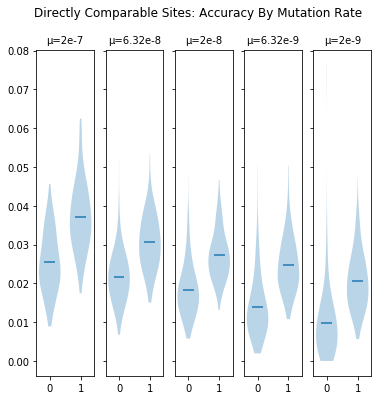

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 6), sharey='row')
#sns.violinplot(y=sample_1000_length_1e5_mut_2e7_new.iloc[:,4].values,ax=axes[0])
axes[0].violinplot(sample_1000_length_1e5_mut_2e7_new.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=False, bw_method=0.5)
axes[0].set_title(u'\u03bc=2e-7', fontsize=10)
axes[0].set_xticks([0,1])
#axes[0].set_xticklabels(('Freq', 'GEVA'))

axes[1].violinplot(sample_1000_length_1e5_mut_632e8_new.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=False, bw_method=0.5)
axes[1].set_title(u'\u03bc=6.32e-8', fontsize=10)
axes[1].set_xticks([0,1])
#axes[1].set_xticklabels(('Freq', 'GEVA'))

axes[2].violinplot(sample_1000_length_1e5_mut_2e8_new.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=False, bw_method=0.5)
axes[2].set_title(u'\u03bc=2e-8', fontsize=10)
axes[2].set_xticks([0,1])
#axes[2].set_xticklabels(('Freq', 'GEVA'))

axes[3].violinplot(sample_1000_length_1e5_mut_632e9_new.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=False, bw_method=0.5)
axes[3].set_title(u'\u03bc=6.32e-9', fontsize=10)
axes[3].set_xticks([0,1])
#axes[3].set_xticklabels(('Freq', 'GEVA'))

axes[4].violinplot(sample_1000_length_1e5_mut_2e9_new.iloc[:,4:6].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=False, bw_method=0.5)
axes[4].set_title(u'\u03bc=2e-9', fontsize=10)
axes[4].set_xticks([0,1])
#axes[4].set_xticklabels(('Freq', 'GEVA'))

fig.subplots_adjust(hspace=0.4)

fig.suptitle("Directly Comparable Sites: Accuracy By Mutation Rate")
#fig.tight_layout()
plt.show()

All sites (not just directly comparable):

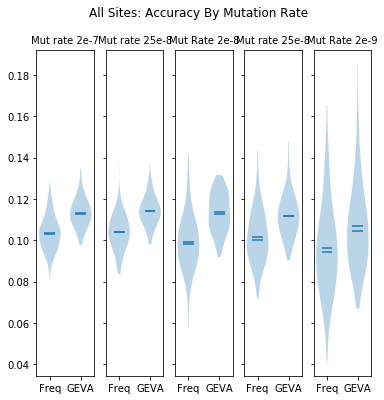

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(6, 6), sharey='row')

all_accuracy_2e7_freq=sample_1000_length_5e4_mut_2e7.iloc[:,1]/(sample_1000_length_5e4_mut_2e7.iloc[:,0]+sample_1000_length_5e4_mut_2e7.iloc[:,1])
all_accuracy_2e7_geva=sample_1000_length_5e4_mut_2e7.iloc[:,3]/(sample_1000_length_5e4_mut_2e7.iloc[:,2]+sample_1000_length_5e4_mut_2e7.iloc[:,3])
axes[0].violinplot([all_accuracy_2e7_freq,all_accuracy_2e7_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0].set_title('Mut rate 2e-7', fontsize=10)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_25e8_freq=sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,1]/(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,0]+sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,1])
all_accuracy_25e8_geva=sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,3]/(sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,2]+sample_1000_length_5e4_mut_25e8_incl_all_distances.iloc[:,3])
axes[1].violinplot([all_accuracy_25e8_freq,all_accuracy_25e8_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[1].set_title('Mut rate 25e-8', fontsize=10)
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_2e8_freq=sample_1000_length_5e4_mut_2e8.iloc[:,1]/(sample_1000_length_5e4_mut_2e8.iloc[:,0]+sample_1000_length_5e4_mut_2e8.iloc[:,1])
all_accuracy_2e8_geva=sample_1000_length_5e4_mut_2e8.iloc[:,3]/(sample_1000_length_5e4_mut_2e8.iloc[:,2]+sample_1000_length_5e4_mut_2e8.iloc[:,3])
axes[2].violinplot([all_accuracy_2e8_freq,all_accuracy_2e8_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[2].set_title('Mut Rate 2e-8', fontsize=10)
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_25e9_freq=sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,1]/(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,0]+sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,1])
all_accuracy_25e9_geva=sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,3]/(sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,2]+sample_1000_length_5e4_mut_25e9_incl_all_distances.iloc[:,3])
axes[3].violinplot([all_accuracy_25e9_freq,all_accuracy_25e9_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[3].set_title('Mut rate 25e-8', fontsize=10)
axes[3].set_xticks([0,1])
axes[3].set_xticklabels(('Freq', 'GEVA'))

all_accuracy_2e9_freq=sample_1000_length_5e4_mut_2e9.iloc[:,1]/(sample_1000_length_5e4_mut_2e9.iloc[:,0]+sample_1000_length_5e4_mut_2e9.iloc[:,1])
all_accuracy_2e9_geva=sample_1000_length_5e4_mut_2e9.iloc[:,3]/(sample_1000_length_5e4_mut_2e9.iloc[:,2]+sample_1000_length_5e4_mut_2e9.iloc[:,3])
axes[4].violinplot([all_accuracy_2e9_freq,all_accuracy_2e9_geva], [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[4].set_title('Mut Rate 2e-9', fontsize=10)
axes[4].set_xticks([0,1])
axes[4].set_xticklabels(('Freq', 'GEVA'))

fig.suptitle("All Sites: Accuracy By Mutation Rate")
fig.subplots_adjust(hspace=0.4)
#fig.tight_layout()
plt.show()

# Plot Average Distance Separating Mutations (only directly comparable though)

In [37]:
length_1e5_rec_2e8=np.zeros((3,3))
length_1e5_rec_2e8[0,0]=sample_100_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[0,1]=sample_100_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[0,2]=sample_100_length_1e5_rec_2e8.mean(0)[4]
length_1e5_rec_2e8[1,0]=sample_500_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[1,1]=sample_500_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[1,2]=sample_500_length_1e5_rec_2e8.mean(0)[4]
length_1e5_rec_2e8[2,0]=sample_1000_length_1e5_rec_2e8.mean(0)[2]
length_1e5_rec_2e8[2,1]=sample_1000_length_1e5_rec_2e8.mean(0)[3]
length_1e5_rec_2e8[2,2]=sample_1000_length_1e5_rec_2e8.mean(0)[4]

length_5e4_rec_2e8=np.zeros((3,3))
length_5e4_rec_2e8[0,0]=sample_100_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[0,1]=sample_100_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[0,2]=sample_100_length_5e4_rec_2e8.mean(0)[4]
length_5e4_rec_2e8[1,0]=sample_500_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[1,1]=sample_500_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[1,2]=sample_500_length_5e4_rec_2e8.mean(0)[4]
length_5e4_rec_2e8[2,0]=sample_1000_length_5e4_rec_2e8.mean(0)[2]
length_5e4_rec_2e8[2,1]=sample_1000_length_5e4_rec_2e8.mean(0)[3]
length_5e4_rec_2e8[2,2]=sample_1000_length_5e4_rec_2e8.mean(0)[4]

Text(0.5,1,'Average Distance Separating Mutations: Length 1e5')

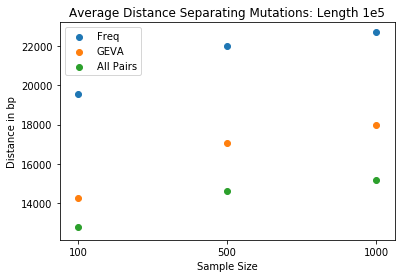

In [38]:
plt.scatter([0,1,2],length_1e5_rec_2e8[:,0],label="Freq")
plt.scatter([0,1,2],length_1e5_rec_2e8[:,1],label="GEVA")
plt.scatter([0,1,2],length_1e5_rec_2e8[:,2],label="All Pairs")

plt.xticks([0,1,2], ('100', '500','1000'))
plt.xlabel("Sample Size")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations: Length 1e5")

Text(0.5,1,'Average Distance Separating Mutations: Length 5e4')

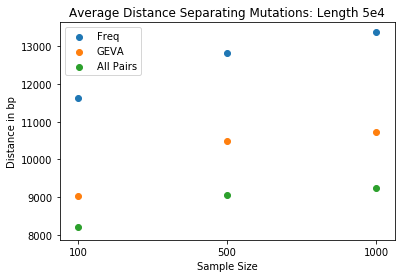

In [39]:
plt.scatter([0,1,2],length_5e4_rec_2e8[:,0],label="Freq")
plt.scatter([0,1,2],length_5e4_rec_2e8[:,1],label="GEVA")
plt.scatter([0,1,2],length_5e4_rec_2e8[:,2],label="All Pairs")

plt.xticks([0,1,2], ('100', '500','1000'))
plt.xlabel("Sample Size")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations: Length 5e4")

## Same thing for different mutation rate schemes

In [40]:
sample_1000_length_5e4_mut_rates=np.zeros((5,3))
sample_1000_length_5e4_mut_rates[0,0]=sample_1000_length_5e4_mut_2e7.mean(0)[6]
sample_1000_length_5e4_mut_rates[0,1]=sample_1000_length_5e4_mut_2e7.mean(0)[7]
sample_1000_length_5e4_mut_rates[0,2]=sample_1000_length_5e4_mut_2e7.mean(0)[8]

sample_1000_length_5e4_mut_rates[1,0]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[6]
sample_1000_length_5e4_mut_rates[1,1]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[7]
sample_1000_length_5e4_mut_rates[1,2]=sample_1000_length_5e4_mut_25e8_incl_all_distances.mean(0)[8]

sample_1000_length_5e4_mut_rates[2,0]=sample_1000_length_5e4_mut_2e8.mean(0)[6]
sample_1000_length_5e4_mut_rates[2,1]=sample_1000_length_5e4_mut_2e8.mean(0)[7]
sample_1000_length_5e4_mut_rates[2,2]=sample_1000_length_5e4_mut_2e8.mean(0)[8]

sample_1000_length_5e4_mut_rates[3,0]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[6]
sample_1000_length_5e4_mut_rates[3,1]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[7]
sample_1000_length_5e4_mut_rates[3,2]=sample_1000_length_5e4_mut_25e9_incl_all_distances.mean(0)[8]

sample_1000_length_5e4_mut_rates[4,0]=sample_1000_length_5e4_mut_2e9.mean(0)[6]
sample_1000_length_5e4_mut_rates[4,1]=sample_1000_length_5e4_mut_2e9.mean(0)[7]
sample_1000_length_5e4_mut_rates[4,2]=sample_1000_length_5e4_mut_2e9.mean(0)[8]

In [41]:
sample_1000_length_1e5_mut_rates=np.zeros((5,3))
sample_1000_length_1e5_mut_rates[0,0]=sample_1000_length_1e5_mut_25e8.mean(0)[6]
sample_1000_length_1e5_mut_rates[0,1]=sample_1000_length_1e5_mut_25e8.mean(0)[7]
sample_1000_length_1e5_mut_rates[0,2]=sample_1000_length_1e5_mut_25e8.mean(0)[8]

sample_1000_length_1e5_mut_rates[1,0]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[1,1]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[1,2]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[2,0]=sample_1000_length_1e5_mut_25e9.mean(0)[6]
sample_1000_length_1e5_mut_rates[2,1]=sample_1000_length_1e5_mut_25e9.mean(0)[7]
sample_1000_length_1e5_mut_rates[2,2]=sample_1000_length_1e5_mut_25e9.mean(0)[8]

sample_1000_length_1e5_mut_rates[3,0]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[3,1]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[3,2]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[8]

sample_1000_length_1e5_mut_rates[4,0]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[6]
sample_1000_length_1e5_mut_rates[4,1]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[7]
sample_1000_length_1e5_mut_rates[4,2]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[8]

In [42]:
sample_1000_length_1e5_mut_rates_new=np.zeros((5,3))
sample_1000_length_1e5_mut_rates_new[0,0]=sample_1000_length_1e5_mut_2e9_new.mean(0)[6]
sample_1000_length_1e5_mut_rates_new[0,1]=sample_1000_length_1e5_mut_2e9_new.mean(0)[7]
sample_1000_length_1e5_mut_rates_new[0,2]=sample_1000_length_1e5_mut_2e9_new.mean(0)[8]

sample_1000_length_1e5_mut_rates_new[1,0]=sample_1000_length_1e5_mut_632e9_new.mean(0)[6]
sample_1000_length_1e5_mut_rates_new[1,1]=sample_1000_length_1e5_mut_632e9_new.mean(0)[7]
sample_1000_length_1e5_mut_rates_new[1,2]=sample_1000_length_1e5_mut_632e9_new.mean(0)[8]

sample_1000_length_1e5_mut_rates_new[2,0]=sample_1000_length_1e5_mut_2e8_new.mean(0)[6]
sample_1000_length_1e5_mut_rates_new[2,1]=sample_1000_length_1e5_mut_2e8_new.mean(0)[7]
sample_1000_length_1e5_mut_rates_new[2,2]=sample_1000_length_1e5_mut_2e8_new.mean(0)[8]

sample_1000_length_1e5_mut_rates_new[3,0]=sample_1000_length_1e5_mut_632e8_new.mean(0)[6]
sample_1000_length_1e5_mut_rates_new[3,1]=sample_1000_length_1e5_mut_632e8_new.mean(0)[7]
sample_1000_length_1e5_mut_rates_new[3,2]=sample_1000_length_1e5_mut_632e8_new.mean(0)[8]

sample_1000_length_1e5_mut_rates_new[4,0]=sample_1000_length_1e5_mut_2e7_new.mean(0)[6]
sample_1000_length_1e5_mut_rates_new[4,1]=sample_1000_length_1e5_mut_2e7_new.mean(0)[7]
sample_1000_length_1e5_mut_rates_new[4,2]=sample_1000_length_1e5_mut_2e7_new.mean(0)[8]

Text(0.5,1,'Average Distance Separating Mutations')

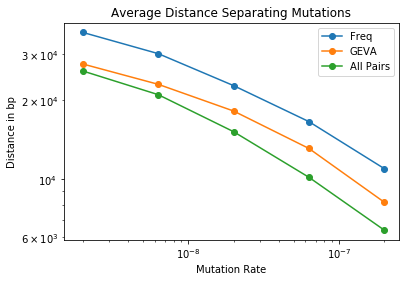

In [43]:
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new[:,0],'-o',label="Freq")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new[:,1],'-o',label="GEVA")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new[:,2],'-o',label="All Pairs")
plt.xlim(1.5e-9,2.5e-7)
plt.yscale('log')
plt.xscale('log')
#plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations")

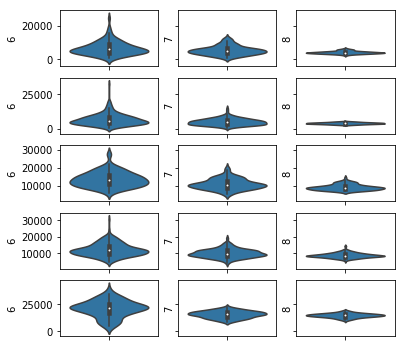

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(6, 6), sharey='row')
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[6],ax=axes[0,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[7],ax=axes[0,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7[8],ax=axes[0,2])

sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[6],ax=axes[1,0])
sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[7],ax=axes[1,1])
sns.violinplot(y=sample_1000_length_5e4_mut_25e8_incl_all_distances[8],ax=axes[1,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e8[6],ax=axes[2,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8[7],ax=axes[2,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8[8],ax=axes[2,2])

sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[6],ax=axes[3,0])
sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[7],ax=axes[3,1])
sns.violinplot(y=sample_1000_length_5e4_mut_25e9_incl_all_distances[8],ax=axes[3,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e9[6],ax=axes[4,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9[7],ax=axes[4,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9[8],ax=axes[4,2])

## Now same for all sites

In [45]:
sample_1000_length_1e5_mut_rates_all_sites=np.zeros((5,3))
sample_1000_length_1e5_mut_rates_all_sites[0,0]=sample_1000_length_1e5_mut_25e8.mean(0)[9]
sample_1000_length_1e5_mut_rates_all_sites[0,1]=sample_1000_length_1e5_mut_25e8.mean(0)[10]
sample_1000_length_1e5_mut_rates_all_sites[0,2]=sample_1000_length_1e5_mut_25e8.mean(0)[11]

sample_1000_length_1e5_mut_rates_all_sites[1,0]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[9]
sample_1000_length_1e5_mut_rates_all_sites[1,1]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[10]
sample_1000_length_1e5_mut_rates_all_sites[1,2]=sample_1000_length_1e5_mut_2e7_incl_all_distances.mean(0)[11]

sample_1000_length_1e5_mut_rates_all_sites[2,0]=sample_1000_length_1e5_mut_25e9.mean(0)[9]
sample_1000_length_1e5_mut_rates_all_sites[2,1]=sample_1000_length_1e5_mut_25e9.mean(0)[10]
sample_1000_length_1e5_mut_rates_all_sites[2,2]=sample_1000_length_1e5_mut_25e9.mean(0)[11]

sample_1000_length_1e5_mut_rates_all_sites[3,0]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[9]
sample_1000_length_1e5_mut_rates_all_sites[3,1]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[10]
sample_1000_length_1e5_mut_rates_all_sites[3,2]=sample_1000_length_1e5_mut_2e8_incl_all_distances.mean(0)[11]

sample_1000_length_1e5_mut_rates_all_sites[4,0]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[9]
sample_1000_length_1e5_mut_rates_all_sites[4,1]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[10]
sample_1000_length_1e5_mut_rates_all_sites[4,2]=sample_1000_length_1e5_mut_2e9_incl_all_distances.mean(0)[11]

In [46]:
sample_1000_length_1e5_mut_rates_new_all_sites=np.zeros((5,3))
sample_1000_length_1e5_mut_rates_new_all_sites[0,0]=sample_1000_length_1e5_mut_2e9_new.mean(0)[9]
sample_1000_length_1e5_mut_rates_new_all_sites[0,1]=sample_1000_length_1e5_mut_2e9_new.mean(0)[10]
sample_1000_length_1e5_mut_rates_new_all_sites[0,2]=sample_1000_length_1e5_mut_2e9_new.mean(0)[11]

sample_1000_length_1e5_mut_rates_new_all_sites[1,0]=sample_1000_length_1e5_mut_632e9_new.mean(0)[9]
sample_1000_length_1e5_mut_rates_new_all_sites[1,1]=sample_1000_length_1e5_mut_632e9_new.mean(0)[10]
sample_1000_length_1e5_mut_rates_new_all_sites[1,2]=sample_1000_length_1e5_mut_632e9_new.mean(0)[11]

sample_1000_length_1e5_mut_rates_new_all_sites[2,0]=sample_1000_length_1e5_mut_2e8_new.mean(0)[9]
sample_1000_length_1e5_mut_rates_new_all_sites[2,1]=sample_1000_length_1e5_mut_2e8_new.mean(0)[10]
sample_1000_length_1e5_mut_rates_new_all_sites[2,2]=sample_1000_length_1e5_mut_2e8_new.mean(0)[11]

sample_1000_length_1e5_mut_rates_new_all_sites[3,0]=sample_1000_length_1e5_mut_632e8_new.mean(0)[9]
sample_1000_length_1e5_mut_rates_new_all_sites[3,1]=sample_1000_length_1e5_mut_632e8_new.mean(0)[10]
sample_1000_length_1e5_mut_rates_new_all_sites[3,2]=sample_1000_length_1e5_mut_632e8_new.mean(0)[11]

sample_1000_length_1e5_mut_rates_new_all_sites[4,0]=sample_1000_length_1e5_mut_2e7_new.mean(0)[9]
sample_1000_length_1e5_mut_rates_new_all_sites[4,1]=sample_1000_length_1e5_mut_2e7_new.mean(0)[10]
sample_1000_length_1e5_mut_rates_new_all_sites[4,2]=sample_1000_length_1e5_mut_2e7_new.mean(0)[11]

Text(0.5,1,'Average Distance Separating Mutations Old')

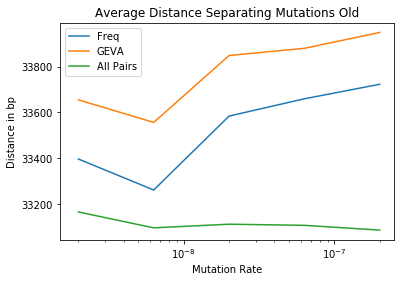

In [47]:
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_all_sites[:,0],label="Freq")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_all_sites[:,1],label="GEVA")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_all_sites[:,2],label="All Pairs")
plt.xlim(1.5e-9,2.5e-7)
#plt.yscale('log')
plt.xscale('log')
#plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations Old")

Text(0.5,1,'Average Distance Separating Mutations NEW')

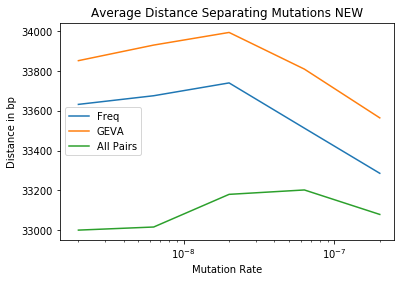

In [48]:
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new_all_sites[:,0],label="Freq")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new_all_sites[:,1],label="GEVA")
plt.plot([2e-9,6.32e-9,2e-8,6.32e-8,2e-7],sample_1000_length_1e5_mut_rates_new_all_sites[:,2],label="All Pairs")
plt.xlim(1.5e-9,2.5e-7)
#plt.yscale('log')
plt.xscale('log')
#plt.xticks([0,1,2,3,4], ('2e-7','25e-8','2e-8','25e-9','2e-9'))
plt.xlabel("Mutation Rate")
plt.ylabel("Distance in bp")
plt.legend()
plt.title("Average Distance Separating Mutations NEW")

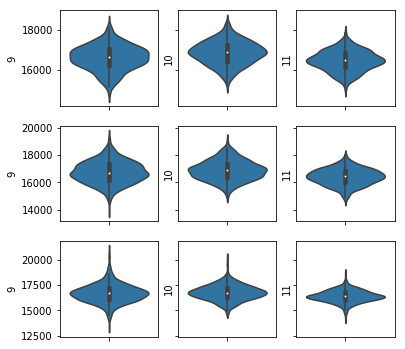

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6), sharey='row')
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[9],ax=axes[0,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[10],ax=axes[0,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e7_incl_all_distances[11],ax=axes[0,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[9],ax=axes[1,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[10],ax=axes[1,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e8_incl_all_distances[11],ax=axes[1,2])

sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[9],ax=axes[2,0])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[10],ax=axes[2,1])
sns.violinplot(y=sample_1000_length_5e4_mut_2e9_incl_all_distances[11],ax=axes[2,2])

# Plotting frequency vs. accuracy

In [50]:
import matplotlib.pyplot as plt

import csv

all_freqs=np.empty(0)

with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/all_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        all_freqs=np.append(all_freqs,row)

freq_freqs=np.empty(0)   
with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/freq_misordered_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        freq_freqs=np.append(freq_freqs,row)

geva_freqs=np.empty(0)
with open('/home/wilderwohns/relative_allele_age/data/testing_allele_freq_5/geva_misordered_frequencies') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        geva_freqs=np.append(geva_freqs,row)


(array([113433.,  18821.,   9832.,   7982.,   5517.,   4054.,   2086.,
          1967.,   1356.,   1704.]),
 array([0.002 , 0.1017, 0.2014, 0.3011, 0.4008, 0.5005, 0.6002, 0.6999,
        0.7996, 0.8993, 0.999 ]),
 <a list of 10 Patch objects>)

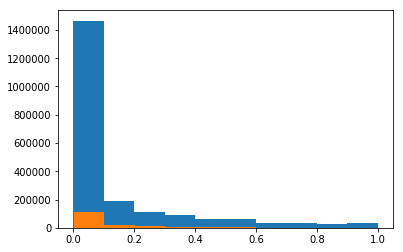

In [51]:
plt.hist(all_freqs)
plt.hist(freq_freqs)

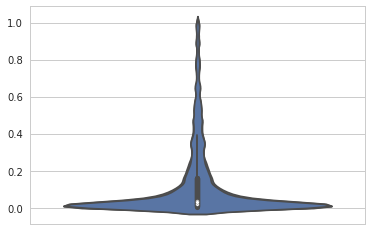

In [52]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.violinplot(y=all_freqs)
ax=sns.violinplot(y=freq_freqs)
ax = sns.violinplot(y=all_freqs)
ax = sns.violinplot(y=geva_freqs)

# Accuracy by Distance

In [53]:
sample_1000_length_5e4_mut_2e7_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/freq_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e7_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e9_incl_all_distances_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/freq_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e9_new_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e9_new/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_632e9_new_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-9_new/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_new_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e8_new/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_632e8_new_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-8_new/freq_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e7_new_freq_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e7_new/freq_accuracy_by_distance",delimiter=",")


In [54]:
sample_1000_length_5e4_mut_2e7_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e7_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e8/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e8_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_25e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_25e9/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_5e4_mut_2e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut_2e9_incl_all_distances/geva_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e7_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e7_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e8/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e8_incl_all_distances/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_25e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mutrate_25e9/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e9_incl_all_distances_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut_2e9_incl_all_distances/geva_accuracy_by_distance",delimiter=",")

sample_1000_length_1e5_mut_2e9_new_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e9_new/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_632e9_new_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-9_new/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e8_new_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e8_new/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_632e8_new_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut6.32e-8_new/geva_accuracy_by_distance",delimiter=",")
sample_1000_length_1e5_mut_2e7_new_geva_distance=np.loadtxt("/home/wilderwohns/relative_allele_age/data/sample1000_length1e5_mut2e7_new/geva_accuracy_by_distance",delimiter=",")


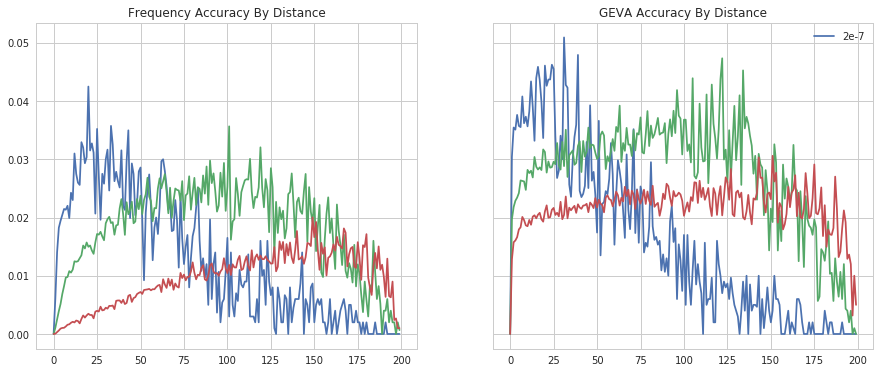

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')

axes[0].plot(sample_1000_length_5e4_mut_2e7_incl_all_distances_freq_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_5e4_mut_25e8_incl_all_distances_freq_distance.mean(0),label="25e-8")
axes[0].plot(sample_1000_length_5e4_mut_2e8_incl_all_distances_freq_distance.mean(0))
#plt.plot(sample_1000_length_5e4_mut_25e9_incl_all_distances_freq_distance.mean(0))
axes[0].plot(sample_1000_length_5e4_mut_2e9_incl_all_distances_freq_distance.mean(0))
axes[0].set_title("Frequency Accuracy By Distance")

axes[1].plot(sample_1000_length_5e4_mut_2e7_incl_all_distances_geva_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_5e4_mut_25e8_incl_all_distances_geva_distance.mean(0))
axes[1].plot(sample_1000_length_5e4_mut_2e8_incl_all_distances_geva_distance.mean(0))
#plt.plot(sample_1000_length_5e4_mut_25e9_incl_all_distances_geva_distance.mean(0))
axes[1].plot(sample_1000_length_5e4_mut_2e9_incl_all_distances_geva_distance.mean(0))
axes[1].set_title("GEVA Accuracy By Distance")
plt.legend()

Text(0.5,1,'GEVA Accuracy By Distance')

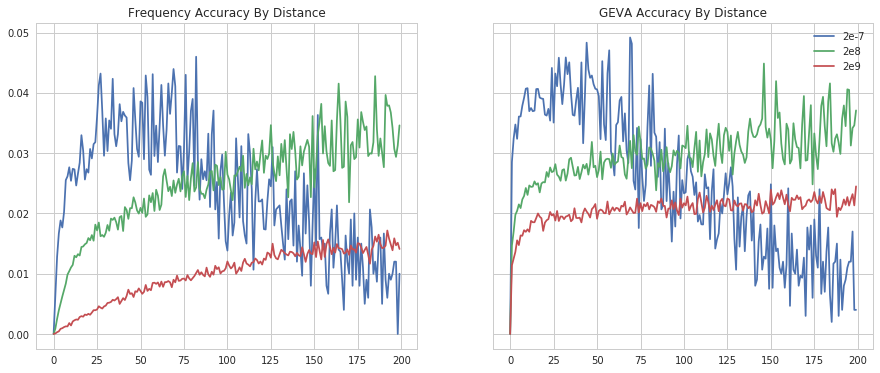

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')

axes[0].plot(sample_1000_length_1e5_mut_2e7_incl_all_distances_freq_distance.mean(0),label="2e-7")
#plt.plot(sample_1000_length_1e5_mut_25e8_incl_all_distances_freq_distance.mean(0),label="25e-8")
axes[0].plot(sample_1000_length_1e5_mut_2e8_incl_all_distances_freq_distance.mean(0),label="2e8")
#plt.plot(sample_1000_length_1e5_mut_25e9_incl_all_distances_freq_distance.mean(0),label="25e9")
axes[0].plot(sample_1000_length_1e5_mut_2e9_incl_all_distances_freq_distance.mean(0),label="2e9")
axes[0].set_title("Frequency Accuracy By Distance")

axes[1].plot(sample_1000_length_1e5_mut_2e7_incl_all_distances_geva_distance.mean(0),label="2e-7")
axes[1].plot(sample_1000_length_1e5_mut_2e8_incl_all_distances_geva_distance.mean(0),label="2e8")
axes[1].plot(sample_1000_length_1e5_mut_2e9_incl_all_distances_geva_distance.mean(0),label="2e9")
plt.legend()
axes[1].set_title("GEVA Accuracy By Distance")

Text(0.5,1,'GEVA Accuracy By Distance')

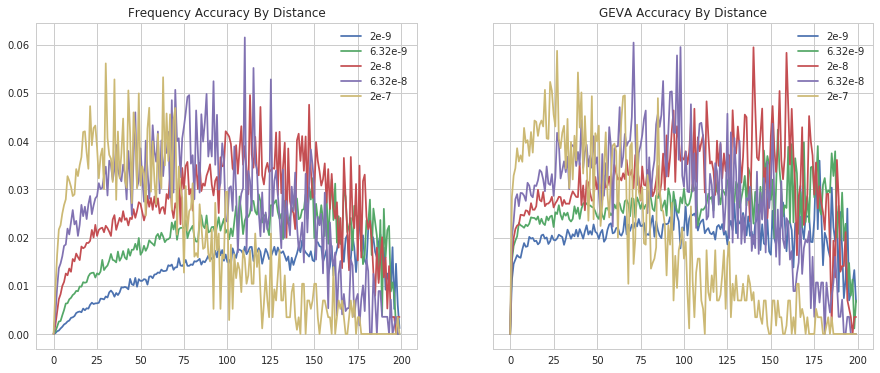

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')

axes[0].plot(sample_1000_length_1e5_mut_2e9_new_freq_distance.mean(0),label="2e-9")
axes[0].plot(sample_1000_length_1e5_mut_632e9_new_freq_distance.mean(0),label="6.32e-9")
axes[0].plot(sample_1000_length_1e5_mut_2e8_new_freq_distance.mean(0),label="2e-8")
axes[0].plot(sample_1000_length_1e5_mut_632e8_new_freq_distance.mean(0),label="6.32e-8")
axes[0].plot(sample_1000_length_1e5_mut_2e7_new_freq_distance.mean(0),label="2e-7")
axes[0].set_title("Frequency Accuracy By Distance")
axes[0].legend()

axes[1].plot(sample_1000_length_1e5_mut_2e9_new_geva_distance.mean(0),label="2e-9")
axes[1].plot(sample_1000_length_1e5_mut_632e9_new_geva_distance.mean(0),label="6.32e-9")
axes[1].plot(sample_1000_length_1e5_mut_2e8_new_geva_distance.mean(0),label="2e-8")
axes[1].plot(sample_1000_length_1e5_mut_632e8_new_geva_distance.mean(0),label="6.32e-8")
axes[1].plot(sample_1000_length_1e5_mut_2e7_new_geva_distance.mean(0),label="2e-7")
axes[1].legend()
axes[1].set_title("GEVA Accuracy By Distance")

In [58]:
#same plot, but every 1000bp instead of 500bp

sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp = np.empty((len(sample_1000_length_1e5_mut_2e9_new_freq_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e9_new_freq_distance):
    sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_632e9_new_freq_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_632e9_new_freq_distance):
    sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_2e8_new_freq_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e8_new_freq_distance):
    sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_632e8_new_freq_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_632e8_new_freq_distance):
    sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_2e7_new_freq_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e7_new_freq_distance):
    sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]

In [59]:
#same plot, but every 1000bp instead of 500bp

sample_1000_length_1e5_mut_2e9_new_geva_distance_1000bp = np.empty((len(sample_1000_length_1e5_mut_2e9_new_geva_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e9_new_geva_distance):
    sample_1000_length_1e5_mut_2e9_new_geva_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_632e9_new_geva_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_632e9_new_geva_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_632e9_new_geva_distance):
    sample_1000_length_1e5_mut_632e9_new_geva_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_2e8_new_geva_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_2e8_new_geva_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e8_new_geva_distance):
    sample_1000_length_1e5_mut_2e8_new_geva_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_632e8_new_geva_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_632e8_new_geva_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_632e8_new_geva_distance):
    sample_1000_length_1e5_mut_632e8_new_geva_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]
sample_1000_length_1e5_mut_2e7_new_geva_distance_1000bp= np.empty((len(sample_1000_length_1e5_mut_2e7_new_geva_distance),100))
for idx,row in enumerate(sample_1000_length_1e5_mut_2e7_new_geva_distance):
    sample_1000_length_1e5_mut_2e7_new_geva_distance_1000bp[idx]=[(row[i]+row[i+1])/2 for i in range(0,200,2)]

Text(0.5,1,'GEVA Accuracy By Distance')

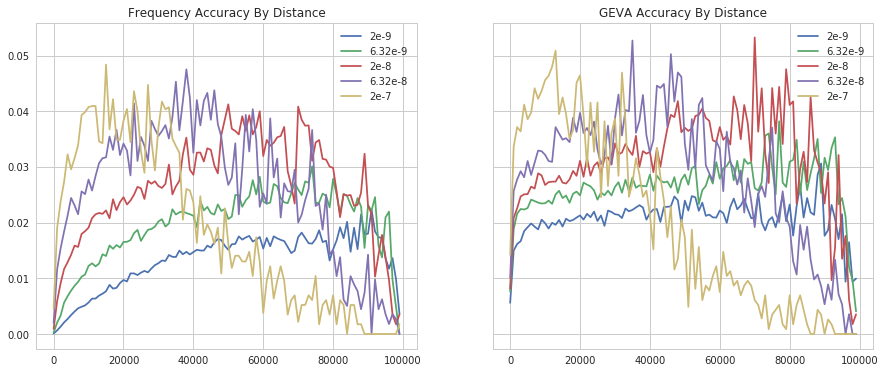

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey='row')
x=range(0,100000,1000)
axes[0].plot(x,sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp.mean(0),label="2e-9")
axes[0].plot(x,sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp.mean(0),label="6.32e-9")
axes[0].plot(x,sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp.mean(0),label="2e-8")
axes[0].plot(x,sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp.mean(0),label="6.32e-8")
axes[0].plot(x,sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp.mean(0),label="2e-7")
axes[0].set_title("Frequency Accuracy By Distance")
axes[0].legend()

axes[1].plot(x,sample_1000_length_1e5_mut_2e9_new_geva_distance_1000bp.mean(0),label="2e-9")
axes[1].plot(x,sample_1000_length_1e5_mut_632e9_new_geva_distance_1000bp.mean(0),label="6.32e-9")
axes[1].plot(x,sample_1000_length_1e5_mut_2e8_new_geva_distance_1000bp.mean(0),label="2e-8")
axes[1].plot(x,sample_1000_length_1e5_mut_632e8_new_geva_distance_1000bp.mean(0),label="6.32e-8")
axes[1].plot(x,sample_1000_length_1e5_mut_2e7_new_geva_distance_1000bp.mean(0),label="2e-7")
axes[1].legend()
axes[1].set_title("GEVA Accuracy By Distance")

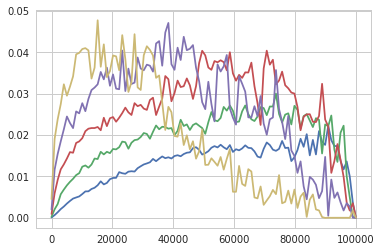

In [61]:
from scipy.interpolate import spline

xnew = np.linspace(0,100000,100) #300 represents number of points to make between T.min and T.max

sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp_smooth = spline(x,sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp.mean(0),xnew)
sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp_smooth = spline(x,sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp.mean(0),xnew)
sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp_smooth = spline(x,sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp.mean(0),xnew)
sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp_smooth = spline(x,sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp.mean(0),xnew)
sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp_smooth = spline(x,sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp.mean(0),xnew)


plt.plot(xnew,sample_1000_length_1e5_mut_2e9_new_freq_distance_1000bp_smooth)
plt.plot(xnew,sample_1000_length_1e5_mut_632e9_new_freq_distance_1000bp_smooth)
plt.plot(xnew,sample_1000_length_1e5_mut_2e8_new_freq_distance_1000bp_smooth)
plt.plot(xnew,sample_1000_length_1e5_mut_632e8_new_freq_distance_1000bp_smooth)
plt.plot(xnew,sample_1000_length_1e5_mut_2e7_new_freq_distance_1000bp_smooth)

plt.show()

# Plot frequency summary stats

In [151]:
frequency_files=[("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e9_freq/frequency_stats",2e-9),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut632e9_freq/frequency_stats",6.32e-9),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e8_freq/frequency_stats",2e-8),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut632e8_freq/frequency_stats",6.32e-8),
                          ('/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e7_freq/frequency_stats',2e-7)]

In [152]:
frequency_files_empirical=[("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e9_freq_empirical/frequency_stats",2e-9),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut632e9_freq_empirical/frequency_stats",6.32e-9),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e8_freq_empirical/frequency_stats",2e-8),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut632e8_freq_empirical/frequency_stats",6.32e-8),
                          ('/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mut2e7_freq_empirical/frequency_stats',2e-7)]

In [165]:
def plot_frequency_stats(file_list):
    dataframes=list()
    for file in file_list:
        dataframes.append(pd.read_csv(file[0]))
    
    directly_comparable_distance_metrics=list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,6],'Mutation Rate':cur_mut_rate,'Method':'Average'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,7],'Mutation Rate':cur_mut_rate,'Method':'Frequency Misordered'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,8],'Mutation Rate':cur_mut_rate,'Method':'GEVA Misordered'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,9],'Mutation Rate':cur_mut_rate,'Method':'Difference'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,10],'Mutation Rate':cur_mut_rate,'Method':'Frequency Difference'}))
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,11],'Mutation Rate':cur_mut_rate,'Method':'GEVA Difference'}))
        
    multiple_mut_rates=pd.concat(directly_comparable_distance_metrics)
    
    #Now for all sites
    all_distance_metrics = list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,0],'Mutation Rate':cur_mut_rate,'Method':'Average'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,1],'Mutation Rate':cur_mut_rate,'Method':'Frequency Misordered'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,2],'Mutation Rate':cur_mut_rate,'Method':'GEVA Misordered'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,3],'Mutation Rate':cur_mut_rate,'Method':'Difference'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,4],'Mutation Rate':cur_mut_rate,'Method':'Frequency Difference'}))
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe.iloc[:,5],'Mutation Rate':cur_mut_rate,'Method':'GEVA Difference'}))

    all_multiple_mut_rates=pd.concat(all_distance_metrics)

    mut_rates = [i[1] for i in file_list]
    pretty_mut_rates = [str(i[1]).split("e")[0]+"$e^{"+str(i[1]).split("e")[1] + "}$" for i in file_list]
    
    #Averages
    direct_mean_by_rate = multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    direct_mean_by_rate.sort_index(level=0)
    
    all_mean_by_rate=all_multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    all_mean_by_rate.sort_index(level=0)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),sharey='row')
    axes[0,0].plot(direct_mean_by_rate.xs("Average"),'-o',label="Average")
    axes[0,0].plot(direct_mean_by_rate.xs("Frequency Misordered"),'-o',label="Frequency Misordered")
    axes[0,0].plot(direct_mean_by_rate.xs("GEVA Misordered"),'-o',label="GEVA Misordered")
    axes[0,0].set_yscale('log')
    axes[0,0].set_xscale('log')
    #plt.xlim(1.5e-9,2.5e-7)
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[0,0].set_xlabel("Mutation Rate")
    axes[0,0].set_ylabel("Proportion Misordered")
    axes[0,0].legend()
    axes[0,0].set_title("Direct Sites:\nFrequency Averages")
 
    axes[0,1].plot(all_mean_by_rate.xs("Average"),'-o',label="Average")
    axes[0,1].plot(all_mean_by_rate.xs("Frequency Misordered"),'-o',label="Frequency Misordered")
    axes[0,1].plot(all_mean_by_rate.xs("GEVA Misordered"),'-o',label="GEVA Misordered")
    axes[0,1].set_yscale('log')
    axes[0,1].set_xscale('log')
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[0,1].set_xlabel("Mutation Rate")
    axes[0,1].set_ylabel("Proportion Misordered")
    axes[0,1].legend()
    axes[0,1].set_title("All Sites:\nFrequency Averages")
    
    axes[1,0].plot(direct_mean_by_rate.xs("Difference"),'-o',label="Difference")
    axes[1,0].plot(direct_mean_by_rate.xs("Frequency Difference"),'-o',label="Frequency Difference")
    axes[1,0].plot(direct_mean_by_rate.xs("GEVA Difference"),'-o',label="GEVA Difference")
    axes[1,0].set_yscale('log')
    axes[1,0].set_xscale('log')
    #plt.xlim(1.5e-9,2.5e-7)
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[1,0].set_xlabel("Mutation Rate")
    axes[1,0].set_ylabel("Proportion Misordered")
    axes[1,0].legend()
    axes[1,0].set_title("Direct Sites:\nFrequency Differences")
    
    axes[1,1].plot(all_mean_by_rate.xs("Difference"),'-o',label="Difference")
    axes[1,1].plot(all_mean_by_rate.xs("Frequency Difference"),'-o',label="Frequency Difference")
    axes[1,1].plot(all_mean_by_rate.xs("GEVA Difference"),'-o',label="GEVA Difference")
    axes[1,1].set_yscale('log')
    axes[1,1].set_xscale('log')
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[1,1].set_xlabel("Mutation Rate")
    axes[1,1].set_ylabel("Proportion Misordered")
    axes[1,1].legend()
    axes[1,1].set_title("All Sites:\nFrequency Differences")
    
    #violin plot method
    #sns.violinplot(x="Mutation Rate", y="Distance", hue="Method", data=multiple_mut_rates)

    plt.tight_layout()
    

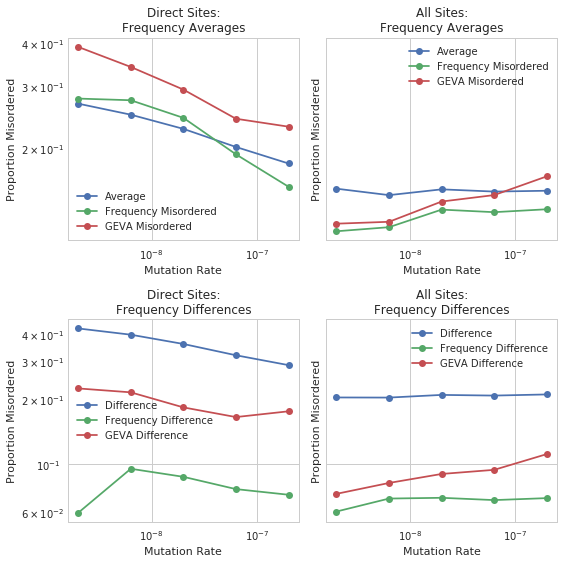

In [166]:
plot_frequency_stats(frequency_files)

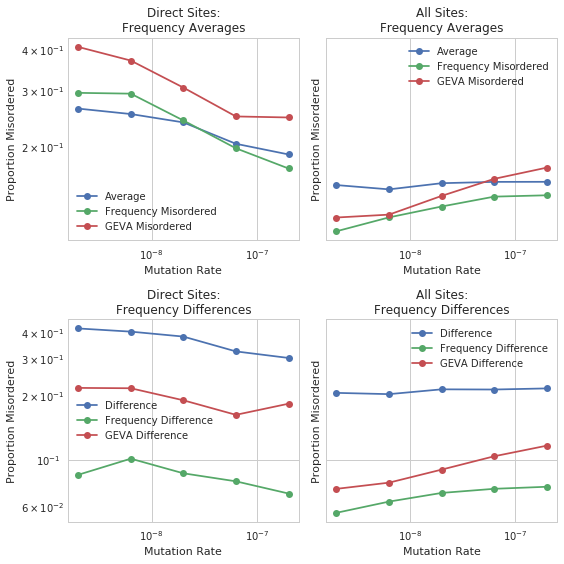

In [167]:
plot_frequency_stats(frequency_files_empirical)

# Plot Imbalance Stats

In [67]:
imbalance_stats=pd.read_csv("/home/wilderwohns/relative_allele_age/data/newfreq_imbalance/imbalance_stats")
imbalance_stats
.applymap(lambda x : x[0])
#TODO FIX THE TUPLE THING!!!

SyntaxError: invalid syntax (<ipython-input-67-642b134ddf24>, line 3)

# What's overlap between what frequency gets wrong and what geva gets wrong?

In [ ]:
#Calculate phi coefficient
geva_matrix_no_singletons=np.loadtxt("/home/wilderwohns/relative_allele_age/data/testing_manual/geva_matrix_no_singletons")
freq_matrix_no_singletons=np.loadtxt("/home/wilderwohns/relative_allele_age/data/testing_manual/freq_matrix_no_singletons")
mutation_pairs=itertools.combinations(range(0,freq_matrix_no_singletons.shape[0]),2)

In [ ]:
import math
freq_array=[freq_matrix_no_singletons[pair[0],pair[1]] for pair in itertools.combinations(range(0,freq_matrix_no_singletons.shape[0]),2)]
geva_array=[geva_matrix_no_singletons[pair[0],pair[1]] for pair in itertools.combinations(range(0,geva_matrix_no_singletons.shape[0]),2)]
#geva_array = [0 if math.isnan(x) else x for x in geva_array]

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(freq_array, geva_array, sample_weight=None)

In [71]:
phi_coefficient=[("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_2e9_phi_coefficient/summary_stats",2e-9),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_632e9_phi_coefficient/summary_stats",6.32e-9),
                          ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_2e8_phi_coefficient/summary_stats",2e-8),
                 ("/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_632e8_phi_coefficient/summary_stats",6.32e-8),
                          ('/home/wilderwohns/relative_allele_age/data/sample1000_length5e4_mutrate_2e7_phi_coefficient/summary_stats',2e-7)]

In [168]:
def plot_phi_coefficient(file_list):
    dataframes=list()
    for file in file_list:
        dataframes.append(pd.read_csv(file[0]))
    
    directly_comparable_distance_metrics=list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        directly_comparable_distance_metrics.append(pd.DataFrame({'Distance': dataframe["Direct Comparison: Phi Coefficient"],'Mutation Rate':cur_mut_rate,'Method':'Direct Comparison: Phi Coefficient'}))
    multiple_mut_rates=pd.concat(directly_comparable_distance_metrics)
    
    #Now for all sites
    all_distance_metrics = list()
    for idx,dataframe in enumerate(dataframes):  
        cur_mut_rate=file_list[idx][1]
        all_distance_metrics.append(pd.DataFrame({'Distance': dataframe["All Sites: Phi Coefficient"],'Mutation Rate':cur_mut_rate,'Method':'All Sites: Phi Coefficient'}))
    all_multiple_mut_rates=pd.concat(all_distance_metrics)

    mut_rates = [i[1] for i in file_list]
    pretty_mut_rates = [str(i[1]).split("e")[0]+"$e^{"+str(i[1]).split("e")[1] + "}$" for i in file_list]
    
    #Averages
    direct_mean_by_rate = multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    direct_mean_by_rate.sort_index(level=0)
    
    all_mean_by_rate=all_multiple_mut_rates.groupby(['Method', 'Mutation Rate']).mean()
    all_mean_by_rate.sort_index(level=0)
    print(all_mean_by_rate.xs('All Sites: Phi Coefficient'))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
#     axes[0].plot(direct_mean_by_rate.xs('Direct Comparison: Phi Coefficient'),'-o',label='Direct Comparison: Phi Coefficient')
#     axes[0].set_yscale('log')
#     axes[0].set_xscale('log')
#     #plt.xlim(1.5e-9,2.5e-7)
#     #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
#     axes[0].set_xlabel("Mutation Rate")
#     axes[0].set_ylabel("Proportion Misordered")
#     axes[0].legend()
#     axes[0].set_title("Direct Sites:\nFrequency Averages")
 
    axes[1].plot(all_mean_by_rate.xs("All Sites: Phi Coefficient"),'-o',label="All Sites: Phi Coefficient")
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    #plt.xticks(range(0,len(pretty_mut_rates)), pretty_mut_rates)
    axes[1].set_xlabel("Mutation Rate")
    axes[1].set_ylabel("Proportion Misordered")
    axes[1].legend()
    axes[1].set_title("All Sites:\nFrequency Averages")

    
    #violin plot method
    #sns.violinplot(x="Mutation Rate", y="Distance", hue="Method", data=multiple_mut_rates)

    plt.tight_layout()
    

               Distance
Mutation Rate          
2.000000e-09   0.405528
6.320000e-09   0.395589
2.000000e-08   0.374287
6.320000e-08   0.380371
2.000000e-07   0.414361


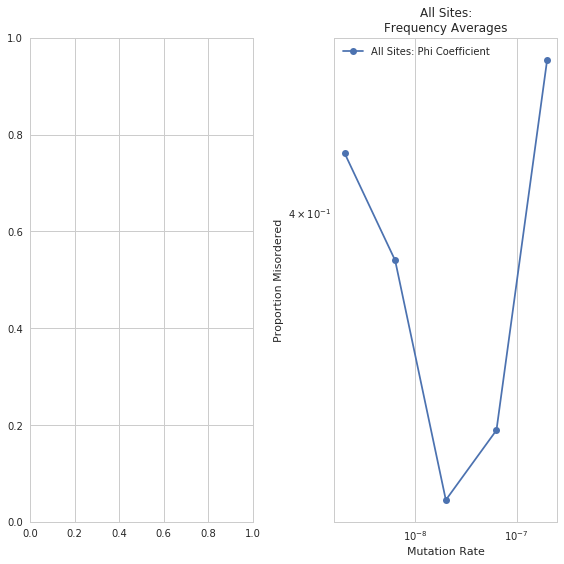

In [169]:
plot_phi_coefficient(phi_coefficient)

# Fix the frequency module


In [ ]:
simulated_ts=msprime.load("/home/wilderwohns/relative_allele_age/data/testsimulated_ts")
ts=msprime.load("/home/wilderwohns/relative_allele_age/data/testing_manual/simulated_ts")
direct_matrix=np.loadtxt("/home/wilderwohns/relative_allele_age/data/testing_manual/direct_matrix")
freq_matrix=np.loadtxt("/home/wilderwohns/relative_allele_age/data/testing_manual/freq_matrix")
geva_matrix=np.loadtxt("/home/wilderwohns/relative_allele_age/data/testing_manual/geva_matrix")

# Implementing error

In [46]:
mutations=list(np.ndenumerate(np.loadtxt("../data/new_test_dir_again/freq_matrix")))


for tree in simulated_ts.trees():
    num_mut_pairs_tree=0
    num_misordered_pairs_tre
    for mutation in tree.mutations():
        len([item for item in mutations if item[0][0] == mutation.id])

NameError: name 'num_misordered_pairs_tre' is not defined

In [419]:

for variant in simulated_ts.variants():
    genotypes=variant.genotypes
    genos_orig=[(genotypes[i],genotypes[i+1]) for i in range(0,genotypes.shape[0],2)]
    genos=[(genotypes[i],genotypes[i+1]) for i in range(0,genotypes.shape[0],2)]
    frequency = np.sum(genotypes) / genotypes.shape[0]
    g0 = [i for i, x in enumerate(genos) if x == (0,0)]
    g1a = [i for i, x in enumerate(genos) if x == (1,0)]
    g1b = [i for i, x in enumerate(genos) if x == (0,1)]
    g2 = [i for i, x in enumerate(genos) if x == (1,1)]
    error_matrix=pd.read_csv("/home/wilderwohns/relative_allele_age/data/result.profile.1000g.platinum.empirical.csv")
    closest_freq = error_matrix.iloc[(error_matrix['freq']-frequency).abs().argsort()[:1]]

    for idx in g0:
        result=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=closest_freq.as_matrix(['p00','p01','p02'])[0]))
        if result == 1:
            genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)'], 1)[0])
        else:
            genos[idx] = result

    for idx in g1a:
        genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=closest_freq.as_matrix(['p10','p11','p12'])[0]))

    for idx in g1b:
        genos[idx]=make_tuple(np.random.choice(['(0,0)','(0,1)','(1,1)'], p=closest_freq.as_matrix(['p10','p11','p12'])[0]))

    for idx in g2:
        result=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=closest_freq.as_matrix(['p20','p21','p22'])[0]))
        if result == 1:
            genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)'], 1)[0])
        else:
            genos[idx] = result
    np.array(sum(genos, ()))

In [433]:
def make_errors_genotype_model(g, error_matrix):
    """
    Given an empirically estimated error matrix, resample for a particular
    variant. Given a true genotype of g0, g1, or g2, return observed genotype
    depending on the error_matrix. For example, given a variant with genotype
    g0, return g0 with probability 99.942%, g1 with probability 0.041%, and
    g2 with probability 0.017%. Treat each pair of alleles as a diploid 
    individual. 
    """
    w = np.copy(g)
    #Make diploid (iterate each pair of alleles)
    genos=[(w[i],w[i+1]) for i in range(0,w.shape[0],2)]
    #Record the true genotypes
    g0 = [i for i, x in enumerate(genos) if x == (0,0)]
    g1a = [i for i, x in enumerate(genos) if x == (1,0)]
    g1b = [i for i, x in enumerate(genos) if x == (0,1)]
    g2 = [i for i, x in enumerate(genos) if x == (1,1)]
    

    for idx in g0:
        result=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=error_matrix.as_matrix(['p00','p01','p02'])[0]))
        if result == 1:
            genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)'], 1)[0])
        else:
            genos[idx] = result

    for idx in g1a:
        genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=error_matrix.as_matrix(['p10','p11','p12'])[0]))

    for idx in g1b:
        genos[idx]=make_tuple(np.random.choice(['(0,0)','(0,1)','(1,1)'], p=error_matrix.as_matrix(['p10','p11','p12'])[0]))

    for idx in g2:
        result=make_tuple(np.random.choice(['(0,0)','(1,0)','(1,1)'], p=error_matrix.as_matrix(['p20','p21','p22'])[0]))
        if result == 1:
            genos[idx]=make_tuple(np.random.choice(['(0,0)','(1,0)'], 1)[0])
        else:
            genos[idx] = result
    return(np.array(sum(genos, ())))
    

In [ ]:
simulated_ts=msprime_simulation("testerror",100, 10000, 1e5, 2e-8, 2e-8)
samples=generate_samples_genotype(simulated_ts, "testerror")
# simulated_ts=msprime.load("/home/wilderwohns/relative_allele_age/data/empirical_test/simulated_ts")
# samples=tsinfer.load("/home/wilderwohns/relative_allele_age/data/empirical_test/empirical_test.samples")

wrong=0
for idx,variant in enumerate(simulated_ts.variants()):
        if any(samples.sites_genotypes[idx] != variant.genotypes):
            wrong = wrong + np.sum(samples.sites_genotypes[idx] != variant.genotypes)
            # print(samples.sites_genotypes[idx])
            # print(variant.genotypes)
            # print(idx,np.sum(samples.sites_genotypes[idx] != variant.genotypes))
            if np.sum(samples.sites_genotypes[idx] != variant.genotypes) > 5:
                print(samples.sites_genotypes[idx])
                print(variant.genotypes)
                print(idx,np.sum(samples.sites_genotypes[idx] != variant.genotypes))

print(wrong/(len(list(simulated_ts.variants()))*100))